<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/thermodynamics/EquationsOfState.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Equations of State
#@markdown In physics and thermodynamics, an equation of state is a thermodynamic equation relating state variables which describe the state of matter under a given set of physical conditions, such as pressure, volume, temperature (PVT), or internal energy. See [Wikipedia page on Equations Of State](https://en.wikipedia.org/wiki/Equation_of_state).
%%capture
!pip install neqsim
import neqsim
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

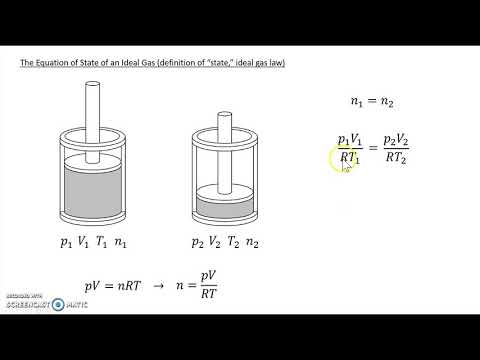

In [2]:
#@title  Introduction to Equations of State
#@markdown Introduction to equations of state with some common examples
from IPython.display import YouTubeVideo
YouTubeVideo('Svu8kpPRnlo', width=600, height=400)

## Cubic Equations of State
Equation of State are used to predict pure component and mixture properties such as compressibility, fugacity and mixture equilibrium.

Cubic equations of state are mathematical models used to predict the thermodynamic properties of fluids, particularly gases. They are called cubic equations because they are third-order polynomial equations in the molar volume, which is often used as the independent variable in thermodynamics.

There are several different cubic equations of state, but some of the most commonly used ones include the van der Waals equation of state, the Redlich-Kwong equation of state, and the Peng-Robinson equation of state.

The van der Waals equation of state is one of the simplest cubic equations of state and is based on the following assumptions:

The gas molecules are treated as hard spheres with a finite volume.
There are weak attractive forces between the molecules, which decrease with distance.
The kinetic energy of the gas molecules is proportional to the temperature.
The van der Waals equation of state can be written as:

P = (RT)/(V-b) - a/(V^2)

where P is the pressure, V is the molar volume, R is the gas constant, T is the temperature, a and b are constants that depend on the properties of the gas, and the superscript "2" denotes squaring.

The Redlich-Kwong equation of state is a slightly more complex cubic equation of state that takes into account the effect of the temperature on the attractive forces between gas molecules. It can be written as:

P = (RT)/(V-b) - (a(T)^0.5)/(V(V+b))

where a and b are constants that depend on the properties of the gas and T is the temperature.

The Peng-Robinson equation of state is a more sophisticated cubic equation of state that includes corrections for both the attractive and repulsive forces between gas molecules. It can be written as:

P = (RT)/(V-b) - {(a(T))/(V(V+b))} + {(b(T))/(V(V+b))}

where a and b are constants that depend on the properties of the gas and T is the temperature.

Cubic equations of state are widely used in the oil and gas industry to predict the behavior of hydrocarbon gases and liquids. They can also be used to model the behavior of other gases and liquids in various industrial applications.

Text(0, 0.5, 'Pressure [bara]')

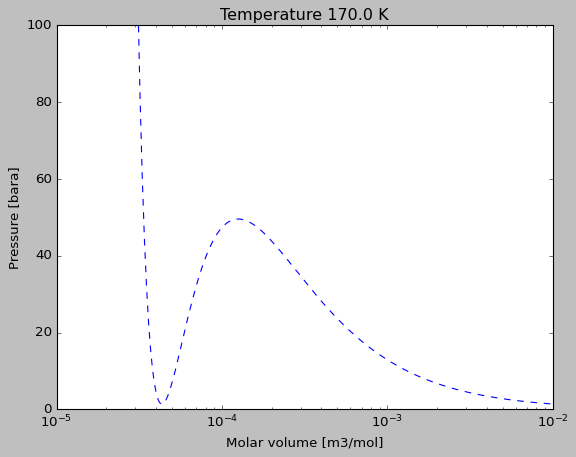

In [3]:
#@title Soave - Redlich - Kwong (SRK) EOS
#@markdown The SRK-EoS is defined as P = RT / (V - b)  - a α / V(V + b)
import math
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
plt.style.use('classic')

Tc= 190.0 #K
Pc = 76.4e5 #Pa
acsFactor=0.01
MolarMass = 16.04 # gr/mol
R = 8.314 #J/mol/K
T = 170.0 #K
Tr = T/Tc #-

a = 0.42748*R*R*Tc*Tc/Pc
b = 0.08664*R*Tc/Pc
alpha = math.pow(1.0 + (0.48 + 1.574*acsFactor - 0.176*acsFactor*acsFactor)*(1.0 - math.pow(Tr,0.5)), 2.0)

def pressure(V):
  P = R*T/(V-b)- a*alpha/(V*(V + b))
  return P/1.0e5

molvolRange = np.arange(0.00003, 0.010, 0.0000010)
densRange = MolarMass/molvolRange/1000.0;
pressureRange = [pressure(vol) for vol in molvolRange]

plt.figure()
plt.plot(molvolRange, pressureRange, '--')
plt.ylim(0, 100.0);
titale = 'Temperature '+str(T)+ ' K'
plt.title(titale)
plt.xscale('log')
plt.xlabel('Molar volume [m3/mol]')
plt.ylabel('Pressure [bara]')

In [4]:
#@title Calculation using SRK in NeqSim
#@markdown The following script calcluates the density of methane using SRK in NeqSim. Checking a point at 150 K and 4 bara

# Creating a fluid in neqsim
fluid1 = fluid('srk') #create a fluid using the SRK-EoS
fluid1.addComponent('methane', 1.0) #adding 1 mole to the fluid
fluid1.setTemperature(170.0, 'K')
fluid1.setPressure(14.0, 'bara')
TPflash(fluid1)
fluid1.initProperties()

print("methane density ", fluid1.getDensity(), " kg/m3")

methane density  18.974940983832  kg/m3


# Check of fugacity of CO2 in gas vs. partial pressure
The fugacity coefficient is defined as the ratio fugacity/pressure. For gases at low pressures (where the ideal gas law is a good approximation), fugacity is roughly equal to partial pressure (y*P). Thus, for an ideal gas, the ratio ϕ = f/P between fugacity f and pressure P (the fugacity coefficient) is equal to 1. In the follwong example we compare the fugacity of CO2 in a gas mixture to the partial pressure of CO2. We use SRK-EoS for calculating the fugacity.

Text(0, 0.5, 'deviation [%]')

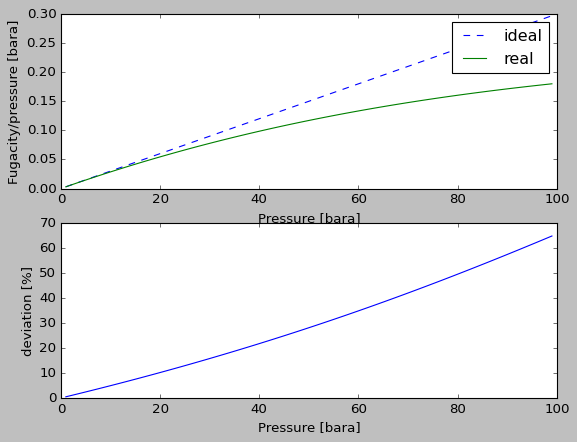

In [5]:
import neqsim
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math

molFraction_CO2 = 0.003   #@param {type:"number"}
molFraction_methane = 0.897   #@param {type:"number"}
molFraction_ethane = 0.1   #@param {type:"number"}
temperature = 20.0   #@param {type:"number"}
minPressure = 1.0  #@param {type:"number"}
maxPressure = 100.0  #@param {type:"number"}

# Creating a fluid in neqsim
fluid1 = fluid('srk')
fluid1.addComponent('CO2', molFraction_CO2, 'mol/sec')
fluid1.addComponent('methane', molFraction_methane, 'mol/sec')
fluid1.addComponent('ethane', molFraction_ethane, 'mol/sec')

fluid1.setTemperature(temperature, 'C')

TPflash(fluid1);

def pressureCO2(pressure, temperature):
      fluid1.setPressure(pressure)
      fluid1.setTemperature(temperature, 'C')
      TPflash(fluid1);
      return fluid1.getPhase('gas').getComponent('CO2').getx()*fluid1.getPressure()

def fugacityCO2(pressure, temperature):
      fluid1.setPressure(pressure)
      fluid1.setTemperature(temperature, 'C')
      TPflash(fluid1);
      return fluid1.getPhase('gas').getFugacity('CO2')

pressure = np.arange(minPressure, maxPressure, int((maxPressure-minPressure)/100)+1)

partialPressure = [pressureCO2(P,temperature) for P in pressure]
fugacity = [fugacityCO2(P,temperature) for P in pressure]
deviation = (np.array(partialPressure) - (np.array(fugacity)))/np.array(fugacity).tolist()*100.0

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(pressure, partialPressure, '--')
plt.plot(pressure, fugacity, '-')
plt.xlabel('Pressure [bara]')
plt.ylabel('Fugacity/pressure [bara]')
plt.legend(['ideal', 'real'])

plt.subplot(2, 1, 2)
plt.plot(pressure, deviation)
plt.xlabel('Pressure [bara]')
plt.ylabel('deviation [%]')

#Equations of State

See: https://ntnuopen.ntnu.no/ntnu-xmlui/handle/11250/231326

Equations of state play an important role in chemical engineering design, and they have
assumed an expanding role in the study of the phase equilibria of fluids and fluid mixtures. In
this section an introduction to equations of state based on the review article of Wei and Sadus
(2000) is presented. Originally, equations of state were used mainly for pure components.
When first applied to mixtures, they were used only for nonpolar (Soave, 1972; Peng and
Robinson, 1976) and slightly polar compounds (Huron et.al., 1978). Subsequently, equations
of state have developed rapidly for the calculation of phase equilibria in non-polar mixtures.
There are many advantages in using equations of state for phase equilibria calculations.
Equations of state can be used typically over wide ranges of temperatures and pressures, and
they can be applied to mixtures of diverse components, ranging from the light gases to heavy
liquids. They can be used to calculate vapour-liquid equilibria, liquid-liquid, and supercritical
fluid phase equilibria without any conceptual difficulties. The calculation of phase equilibria
has been discussed extensively elsewhere (Sandler 1994, Michelsen et.al. 2000).

The van der Walls equation of state was the first equation to predict vapour-liquid
coexistence. Later, the Redlich-Kwong equation of state (Redlich and Kwong, 1949)
improved the accuracy of the van der Waals equation by introducing temperature-dependence
for the attractive term. Soave (1972) and Peng and Robinson (1976) proposed additional
modifications to more accurately predict the vapour pressure, liquid density, and equilibria
ratios. In later work the attractive term in the Redlich and Kwong model has been modified to represent the vapour pressures of polar non-ideal components (Schwartzentruber and Renon
(1989), Mathias (1983)).

In addition of modelling small molecules, considerably emphasis has been placed recently on
modelling chain-like molecules. Based on the theories of Prigogine (1957) and Flory (1965),
other workers (Beret and Prausnitz, 1975; Donohue and Prausnitz, 1978) developed a
perturbed hard chain theory (PHCT) equation of state for chain molecules. To take into
account the increase in attractions due to dipolar and quadrupolar forces, Vilmalchand and
Donohue (1985) obtaines fairly accurate multipolar mixture calculations by using the
perturbed anisotropic chain theory (PACT). Ikonomu and Donohue (1986) extended PACT to
obtain an equation of state which takes into account the existence of hydrogen bounding,
namely, the associated perturbed anisotropic chain theory (APACT) equation of state.
Advances in statistical mechanics and an increased computer power have allowed the
development of equations of state based on molecular principles that are accurate for real
fluids and mixtures. Using Wertheim’s theory (Wertheim, 1984a,b), Chapman et.al. (1990)
and Huang and Radosz (1990) developed the statistical associating fluid theory (SAFT) which
is accurate for pure fluids and mixtures containing associating fluids. Recently, various
modified versions, such as LJ-SAFT (Banaszak et.al. 1994) and VR-SAFT (Gill-Villegas
et.al., 1997) have been developed. A common feature of many newly developed equation of
state is the increasing use of insights gained from molecular simulation to improve the
accuracy of the underlying model.

In this section some of the most common and some more resent equations of state will be
reviewed and tested for their capability to predict thermodynamic properties of pure
components. The components we will consider are methane, CO2, nitrogen, water and
MDEA. In section 3.4 mixing rules will be reviewed and evaluated.

##Equation of State for Simple Molecules
The van der Waals equation of state, proposed in 1873, was the first equation capable of
representing vapour-liquid coexistence. The VdW equation of state is given by The van der Waals equation of state, proposed in 1873, was the first equation capable of
representing vapour-liquid coexistence. The VdW equation of state is given by .....

In [6]:
#
# Script bubp.py - calculation of saturated properties
# of pure components
# Even Solbraa, 2001
#
# Create a thermodynamic system - using the preferred
# equation of state (eg. srk, cpa,pr)
system = fluid('srk')
system.setPressure(1.0, 'bara')
# Add a component to the system
addComponent(system,'water',1.0)
# do a bubble point temperature flash
bubt(system)
print('buble point temperature', system.getTemperature('C'))
#printFrame(system)

buble point temperature 102.08743210205034


# The CPA-EoS
CPA (Cubic-Plus-Association) is an equation of state that is based on a combination of the Soave−Redlich−Kwong (SRK) equation with the association term of the Wertheim theory.

The CPA (Cubic-Plus-Association) equation of state is a more advanced and accurate equation of state than the cubic equations of state mentioned earlier. It is particularly well-suited for modeling fluids with associating molecules, such as alcohols, water, and some hydrocarbons.

The CPA equation of state combines a cubic equation of state, such as the van der Waals or Redlich-Kwong equation, with a term that accounts for the association between molecules. This association term is based on the statistical associating fluid theory (SAFT), which assumes that the molecules are capable of forming clusters or associations in the liquid phase.

The CPA equation of state has several advantages over the simpler cubic equations of state, including:

Accurate prediction of vapor-liquid equilibria, particularly for fluids with associating molecules.
Ability to predict the properties of mixtures containing polar and nonpolar molecules.
Ability to predict the properties of fluids at high pressures.
The CPA equation of state has been applied in various fields, including the oil and gas industry, chemical engineering, and environmental engineering. It is particularly useful for modeling the behavior of fluids in complex industrial processes, such as distillation, extraction, and separation. The accuracy and flexibility of the CPA equation of state make it a valuable tool for both fundamental research and practical applications.

The Cubic-Plus-Association (CPA) equation of state (EoS) is a modern and advanced EoS that combines the strengths of cubic equations of state (like the SRK or PR EoS) with the Wertheim Thermodynamic Perturbation Theory (TPT) used to describe association due to hydrogen bonding.

The idea behind CPA is to better predict the phase behavior of systems containing associating molecules, such as water, alcohols, and acids, which aren't adequately described by traditional cubic EoS alone.

### **The CPA Equation of State**:

#### **1. Cubic Part**:
The cubic part of CPA is used to account for the non-associating or physical interactions in the system. Typically, the Soave-Redlich-Kwong (SRK) or the Peng-Robinson (PR) cubic forms can be used.

For the SRK form, the cubic equation is:
 $P = \frac{RT}{v - b} - \frac{a \alpha(T)}{v(v+b)} $

Where:
-  P  = Pressure
-  R  = Universal gas constant
-  T  = Absolute temperature
-  v  = Molar volume
-  a  and  b  = EoS parameters
-  \alpha(T)  = Temperature correction function

#### **2. Associative Part**:
The associative part describes the molecules' ability to form hydrogen bonds or other association sites. It employs the Wertheim TPT. The Helmholtz free energy is described in terms of monomer density and bonding probabilities.

For a simple 2B association model (two association sites per molecule):
 $\Delta A_{assoc} = \frac{n \rho \delta}{2} \left[ \ln g(r) X^2 - \frac{X^2}{2} + \frac{1}{2} \right] $

Where:
-  n  = Number of association sites per molecule
-  \rho  = Density
-  \delta  = Association volume
-  g(r)  = Radial distribution function at contact
-  X  = Fraction of non-associated sites, given by:
$ X = \frac{1}{1 + n \rho \delta g(r) X} $

### **Applications**:
The CPA EoS is particularly useful for:
- Predicting phase behavior of systems containing associating fluids.
- Modeling vapor-liquid equilibria (VLE), liquid-liquid equilibria (LLE), and vapor-liquid-liquid equilibria (VLLE) in mixtures containing water, alcohols, and acids.
- Predicting thermodynamic properties over a wide range of conditions.

The CPA EoS combines the strengths of cubic equations, which account for the physical interactions between molecules, with association theories that account for hydrogen bonding. This combination allows for a more accurate representation of real fluids, especially those with associating components.

In [7]:
from neqsim.thermo import dataFrame
system = fluid('cpa')
system.addComponent('methane',1.0, 'mol/sec')
system.addComponent('water',1.0, 'mol/sec')
system.setMixingRule(10) # Composition dependent and temperature dependent mixing rule
system.setPressure(10.0, 'bara')
system.setTemperature(25.0, 'C')
TPflash(system)
dataFrame(system)

,0,1,2,3,4,5,6
0,,total,GAS,AQUEOUS,,,
1,methane,5E-1,9.96691E-1,2.54953E-4,,,[mole fraction]
2,water,5E-1,3.30883E-3,9.99745E-1,,,[mole fraction]
3,,,,,,,
4,Density,,6.58537E0,9.9497E2,,,kg/m3
5,Phase Fraction,,5.01532E-1,4.98468E-1,,,[mole fraction]
6,Molar Mass,1.7029E-2,1.60495E-2,1.80145E-2,,,kg/mol
7,Z factor,,9.83135E-1,7.3037E-3,,,[-]
8,Heat Capacity (Cp),,2.29308E0,3.6523E0,,,kJ/kgK
9,Heat Capacity (Cv),,1.72085E0,3.27804E0,,,kJ/kgK


# Peng Robinson and PRU-UMR

In the following code we test the effect of changing binary interaction coefficient for calculation of bubbplepoint of a ethane-nC15 binary mixture. See: https://ntnuopen.ntnu.no/ntnu-xmlui/handle/11250/235103?show=full

In [8]:
from neqsim.thermo import *

fluid1 = fluid('pr')
fluid1.addComponent('ethane', 0.01)
fluid1.addComponent('nC15', 0.99)
fluid1.setMixingRule('classic')
fluid1.setTemperature(40.0, 'C')

# Range of kij values
kij_values = [-0.04,-0.03,-0.02,-0.01, 0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]


# Loop through each kij value and calculate the bubble point pressure
for kij in kij_values:
    # Set the interaction parameter
    fluid1.getPhase(0).getMixingRule().setBinaryInteractionParameter(0,1, kij)
    fluid1.getPhase(1).getMixingRule().setBinaryInteractionParameter(0,1, kij)

    #Calculate bubble point pressure
    pres = bubp(fluid1)
    print('kij: ', kij, ' Bubble point pressure (bar): ', pres)

kij:  -0.04  Bubble point pressure (bar):  0.2959004462858464
kij:  -0.03  Bubble point pressure (bar):  0.31188065336431114
kij:  -0.02  Bubble point pressure (bar):  0.32872676779945686
kij:  -0.01  Bubble point pressure (bar):  0.3464860253908811
kij:  0  Bubble point pressure (bar):  0.3652082743390466
kij:  0.01  Bubble point pressure (bar):  0.38494612374802456
kij:  0.02  Bubble point pressure (bar):  0.4057551010228639
kij:  0.03  Bubble point pressure (bar):  0.42769381874499524
kij:  0.04  Bubble point pressure (bar):  0.4508241516529002
kij:  0.05  Bubble point pressure (bar):  0.47521142440298586
kij:  0.06  Bubble point pressure (bar):  0.5009246108376355
kij:  0.07  Bubble point pressure (bar):  0.5280365455440931
kij:  0.08  Bubble point pressure (bar):  0.5566241485498915
kij:  0.09  Bubble point pressure (bar):  0.5867686640682752
kij:  0.1  Bubble point pressure (bar):  0.6185559142814527


In the following script we calculate the bublepoint of the same mixutre using the UMR-PRU EoS (Peng Robinson with Unifac mixing rule).

In [9]:
from neqsim.thermo import *

fluid1 = fluid('umr')
fluid1.addComponent('ethane', 0.01)
fluid1.addComponent('nC15', 0.99)
fluid1.setMixingRule("HV", "UNIFAC_UMRPRU")
fluid1.setTemperature(40.0, 'C')

#Calculate bubble point pressure
pres = bubp(fluid1)
print('kij: ', kij, ' Bubble point pressure (bar): ', pres)

kij:  0.1  Bubble point pressure (bar):  0.30331471715229674
